# Sentiment Analysis on Amazon Product Reviews on Indian Products

## Read the csv file into a Pandas DataFrame

In [1]:
import pandas as pd

file_path = 'amazon_reviews.csv'

df = pd.read_csv(file_path)

df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


## EDA on dataset

In [2]:
df.dtypes

asin      object
name      object
date      object
rating     int64
review    object
dtype: object

In [3]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [4]:
df.dropna(subset=['review'], inplace=True)

In [5]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['rating'].value_counts()

5    1444
1     546
4     460
3     198
2     130
Name: rating, dtype: int64

## Plotting the distribution of ratings using Seaborn

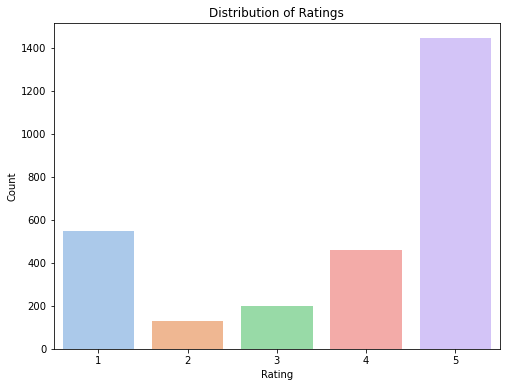

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', palette='pastel')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Counting Unique Products

In [9]:
df['name'].value_counts()

Tata-Tea-Gold-500g                              58
Society-Tea-Masala-Jar-250g                     40
Fastrack-Casual-Analog-Blue-Watch-NK3124SL02    40
Mamaearth-Percent-Natural-Berry-Toothpaste      40
Cinthol-Lime-Soap-100-Pack                      40
                                                ..
Patanjali-UHT-Milk-1000-ml                      10
Indiana-Frutti-Cherries-Frooti-Multicolor        6
Amul-Cow-Ghee-500ml                              4
Tata-Tea-Premium-1-5kg                           2
Patanjali-Ayurved-Ltd-CORO-NIL-Tablet            2
Name: name, Length: 122, dtype: int64

## Import Necessary Libraries
#### The VADER model is used for sentiment analysis of text, providing a compound score

In [10]:
#nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

In [11]:
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


## Adding vader scores into dataframe
#### Compound scores can determine the overall sentiment (positive, neutral, negative)
#### It analyzes text and assigns sentiment scores for positive, negative, neutral, and compound (overall) sentiment

In [12]:
import pandas as pd
# TODO: Iterate through and get the polarity scores
scores = [vader.polarity_scores(text) for text in df['review']]

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames
df_score = df.join(scores_df)
df_score.dropna(subset=['compound'], inplace=True)

In [13]:
df_score

,asin,name,date,rating,review,neg,neu,pos,compound
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0.074,0.741,0.186,0.9102
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,0.074,0.734,0.192,0.8856
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,0.240,0.617,0.144,-0.4224
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,0.227,0.696,0.078,-0.9577
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,0.035,0.795,0.170,0.8597
...,...,...,...,...,...,...,...,...,...
2773,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-07-03,5,"Best soothing, cooling fragrance for hot summe...",0.000,1.000,0.000,0.0000
2774,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-08-21,1,No return and replaceAdd more tex,0.000,1.000,0.000,0.0000
2775,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-08-23,5,Been using it for 45 years . The best soap ever .,0.000,1.000,0.000,0.0000
2776,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-05-09,5,Fantastic,0.000,0.204,0.796,0.5994


## Finding Relationship Between Positive Score vs Positive Rating and Same for Negative

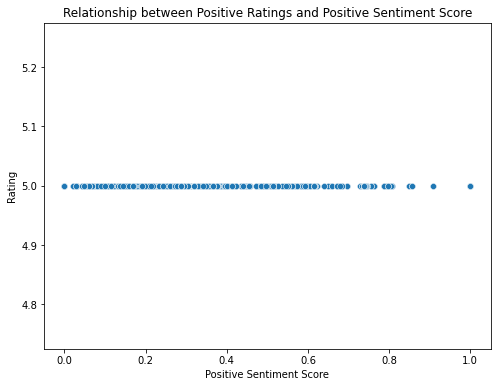

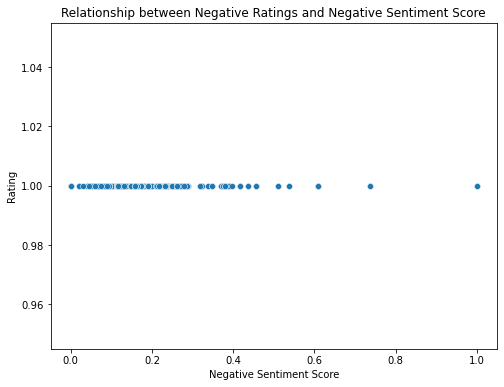

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for positive ratings (rating=5) and negative ratings (rating=1)
positive_reviews = df_score[df_score['rating'] == 5]
negative_reviews = df_score[df_score['rating'] == 1]

# Relationship between positive ratings and 'pos' sentiment score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pos', y='rating', data=positive_reviews)
plt.title('Relationship between Positive Ratings and Positive Sentiment Score')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Rating')
plt.show()

# Relationship between negative ratings and 'neg' sentiment score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='neg', y='rating', data=negative_reviews)
plt.title('Relationship between Negative Ratings and Negative Sentiment Score')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Rating')
plt.show()


## Grouping Common products using their common ASIN for finding product specific sentiment

In [17]:
compound_scores = df_score.groupby('asin')['compound'].mean().reset_index()
compound_scores

,asin,compound
0,B002ZVK88G,0.13906
1,B003OPTXW4,0.40866
2,B008YD5500,0.37270
3,B008YD57OO,0.05098
4,B00AI87X0O,0.36830
...,...,...
140,B08CN7SJBX,0.24959
141,B08DLL7C2D,-0.04901
142,B08GLVHLPW,0.28843
143,B08GWV3SM6,0.35994


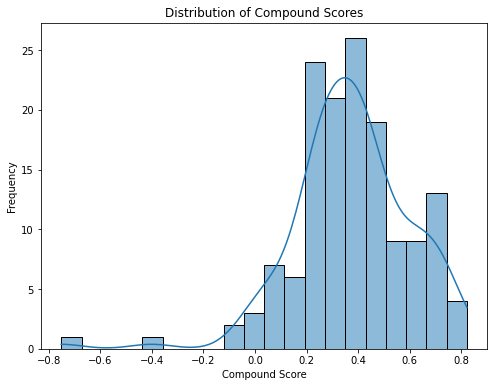

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(compound_scores['compound'], bins=20, kde=True)
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

## Top and Bottom Products by Sentiment

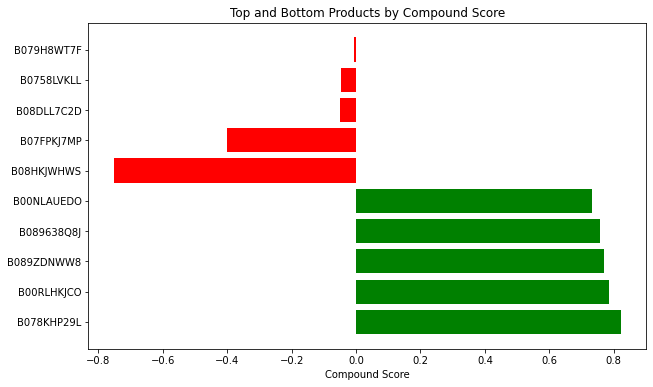

In [31]:
import matplotlib.pyplot as plt

# Top and Bottom Products by Sentiment
top_products = compound_scores.nlargest(5, 'compound')
bottom_products = compound_scores.nsmallest(5, 'compound')

# Concatenating top and bottom products for plotting
top_bottom_products = pd.concat([top_products, bottom_products])

# Bar plot for top and bottom products based on compound scores
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in top_bottom_products['compound']]
plt.barh(top_bottom_products['asin'], top_bottom_products['compound'], color=colors)
plt.xlabel('Compound Score')
plt.title('Top and Bottom Products by Compound Score')
plt.show()


## Write-Up

This project focused on analyzing sentiment within Amazon product reviews using the VADER sentiment analysis tool in Python. Initially, the data from the 'amazon_reviews.csv' file was loaded into a Pandas DataFrame for exploratory data analysis (EDA). The dataset was cleaned by handling missing values and converting the 'date' column to datetime format.

The distribution of ratings was visualized using Seaborn, providing an overview of how ratings were distributed among the reviews. Additionally, the count of unique products was explored to understand the frequency of reviews per product.

The VADER sentiment analysis tool was utilized to derive sentiment scores (positive, negative, neutral, and compound) for each review. The relationship between positive and negative sentiment scores and their respective ratings (5 and 1) was visualized to observe any correlation between sentiment and ratings.

Furthermore, the analysis delved into grouping products by their ASIN and determining the average compound sentiment score for each product. This facilitated the identification of top and bottom products based on their sentiment scores, visualized using a bar plot showcasing the products with the highest and lowest average sentiment scores.

Overall, this project showcased the application of sentiment analysis techniques to extract insights from Amazon product reviews, enabling a better understanding of customer sentiment toward various products. The process involved data cleaning, exploratory analysis, sentiment scoring, and visualization, offering valuable insights into product-specific sentiments.